In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [2]:
# Memisahkan data latih dan data uji
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# -------------------------
# K-Means tanpa Autoencoder
# -------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
labels_no_autoencoder = kmeans.predict(X_scaled)  # Menggunakan predict untuk mendapatkan label pada seluruh data

# -------------------------
# Autoencoder
# -------------------------
# Membangun Autoencoder
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)  # Mengurangi dimensi ke 2
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Kompilasi dan melatih Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Menggunakan Encoder untuk mendapatkan representasi
X_encoded = encoder.predict(X_scaled)

# K-Means dengan Autoencoder
kmeans_autoencoder = KMeans(n_clusters=3, random_state=42)
kmeans_autoencoder.fit(X_encoded)
labels_autoencoder = kmeans_autoencoder.predict(X_encoded)  # Menggunakan predict untuk mendapatkan label pada data tereduksi

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


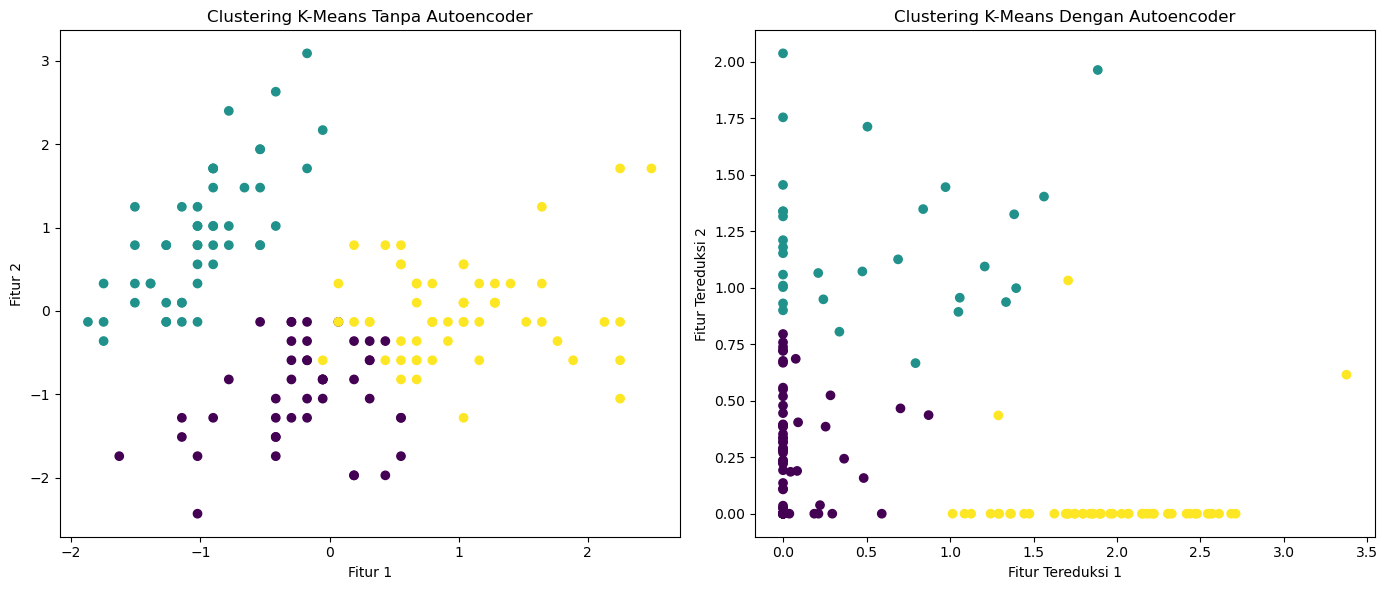

In [3]:
# -------------------------
# Visualisasi Hasil Clustering
# -------------------------
plt.figure(figsize=(14, 6))

# K-Means Tanpa Autoencoder
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_no_autoencoder, cmap='viridis', marker='o')
plt.title('Clustering K-Means Tanpa Autoencoder')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')

# K-Means Dengan Autoencoder
plt.subplot(1, 2, 2)
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=labels_autoencoder, cmap='viridis', marker='o')
plt.title('Clustering K-Means Dengan Autoencoder')
plt.xlabel('Fitur Tereduksi 1')
plt.ylabel('Fitur Tereduksi 2')

plt.tight_layout()
plt.show()